This is the code for my (Michael Sell) Astrophysics simulated orbit. 



In [9]:

import numpy as np
import pylab as pl
import astropy.units as u
from galpy.orbit import Orbit
import galpy.util.coords as coords
from galpy.potential import MWPotential2014


N = 15000   #Number of objects

# Physical Paramters
R0 = 8*u.kpc #kpc
z0 = 0.025*u.kpc #kpc
V0 = 220*u.km/u.s   #km/s
u_sun = -11.1 #km/s
v_sun = 7.25*u.km / u.s  #km/s
w_sun = 12.24 #km/s


Create velocity ellipsoid diagram for white dwarfs, plotting random selection of velocities in a Toomre diagram, and converting one for each into cylindrical coordinates.

[ -4.1998584  -20.73015737 -26.72186352]
[-56.17606071   4.69220763 -31.68358179]
[-63.85836661 -33.81690872 -39.25355117]
/var/folders/hj/93g2dpgj78s9f05h5s0b10mw0000gn/T/ipykernel_80353/3721507112.py:20: RuntimeWarning: invalid value encountered in sqrt
  ax1.plot(nUVW_halo[:,1],np.sqrt(nUVW_halo[:,0]**2 + nUVW_halo[:,2]), marker='.', ms=3, ls='none', label='halo')

/var/folders/hj/93g2dpgj78s9f05h5s0b10mw0000gn/T/ipykernel_80353/3721507112.py:21: RuntimeWarning: invalid value encountered in sqrt
  ax1.plot(nUVW_thick[:,1],np.sqrt(nUVW_thick[:,0]**2 + nUVW_thick[:,2]), marker='.', ms=3, ls='none', label='thick disk')

/var/folders/hj/93g2dpgj78s9f05h5s0b10mw0000gn/T/ipykernel_80353/3721507112.py:22: RuntimeWarning: invalid value encountered in sqrt
  ax1.plot(nUVW_thin[:,1],np.sqrt(nUVW_thin[:,0]**2 + nUVW_thin[:,2]), marker='.', ms=3, ls='none', label='thin disk')



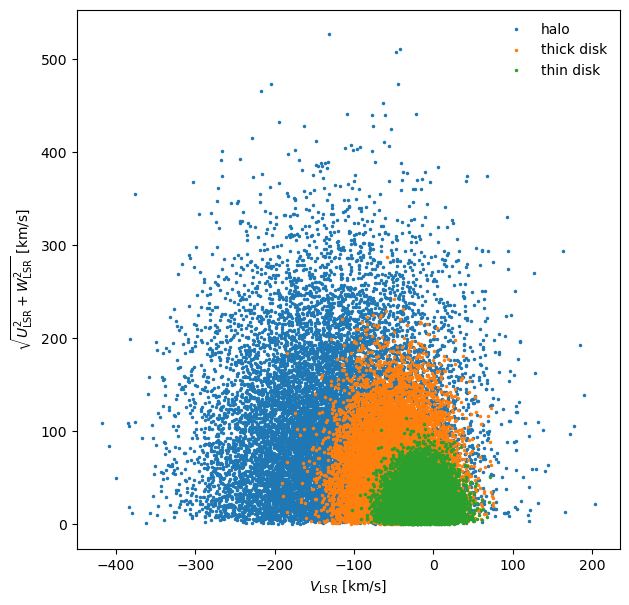

In [10]:
np.random.seed(9)

# velocity ellipsoid
UVW_thin = np.array([[-4.23,27.19],[-14.67,20.93],[-4.78,19.66]])
UVW_thick = np.array([[-29.82,59.94],[-48.63,34.69],[-6.43,39.7]])
UVW_halo = np.array([[-41.17,120.46],[-123.34,78.29],[-6.79,78.31]])

nUVW_thin = np.random.normal(UVW_thin[:,0],UVW_thin[:,1],(N,3))
nUVW_thick = np.random.normal(UVW_thick[:,0],UVW_thick[:,1],(N,3))
nUVW_halo = np.random.normal(UVW_halo[:,0],UVW_halo[:,1],(N,3))

print(nUVW_thin[0])
print(nUVW_thick[0])
print(nUVW_halo[0])

fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

ax1.plot(nUVW_halo[:,1],np.sqrt(nUVW_halo[:,0]**2 + nUVW_halo[:,2]), marker='.', ms=3, ls='none', label='halo')
ax1.plot(nUVW_thick[:,1],np.sqrt(nUVW_thick[:,0]**2 + nUVW_thick[:,2]), marker='.', ms=3, ls='none', label='thick disk')
ax1.plot(nUVW_thin[:,1],np.sqrt(nUVW_thin[:,0]**2 + nUVW_thin[:,2]), marker='.', ms=3, ls='none', label='thin disk')

ax1.set_xlabel(r'$V_{\rm LSR}$ [km/s]')
ax1.set_ylabel(r'$\sqrt{U^2_{\rm LSR} + W^2_{\rm LSR}}$ [km/s]')

pl.legend(frameon=False)


pl.show()

XYZ = [8,0.0,0.025]
RTZ_thin = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_thin = coords.rect_to_cyl_vec(nUVW_thin[0,0],nUVW_thin[0,1],nUVW_thin[0,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

RTZ_thick = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_thick = coords.rect_to_cyl_vec(nUVW_thick[0,0],nUVW_thick[0,1],nUVW_thick[0,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

RTZ_halo = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_halo = coords.rect_to_cyl_vec(nUVW_halo[0,0],nUVW_halo[0,1],nUVW_halo[0,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)


Create three orbits for thin-disk, thick-disk, and halo white dwarfs, respectivelly. After, we create an array of timesteps and integrate the orbits

In [11]:
star_thin = [RTZ_thin[0]/8.,vRTZ_thin[0]/220,1+vRTZ_thin[1]/220,RTZ_thin[2]/8,vRTZ_thin[2]/220,RTZ_thin[1]]
print(star_thin)
star_thick = [RTZ_thick[0]/8.,vRTZ_thick[0]/220,1+vRTZ_thick[1]/220,RTZ_thick[2]/8,vRTZ_thick[2]/220,RTZ_thick[1]]
print(star_thick)
star_halo = [RTZ_halo[0]/8.,vRTZ_halo[0]/220,1+vRTZ_halo[1]/220,RTZ_halo[2]/8,vRTZ_halo[2]/220,RTZ_halo[1]]
print(star_halo)

ts = np.linspace(0,2,10000)*u.Gyr

o_thin = Orbit(star_thin, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thin.integrate(ts,MWPotential2014)

o_thick = Orbit(star_thick, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thick.integrate(ts,MWPotential2014)

o_halo = Orbit(star_halo, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_halo.integrate(ts,MWPotential2014)



# printing eccentricity and angular momentum (z component)
print('e = ', round(o_thin.e(),3), 'Lz = ', o_thin.Lz(quantity=True))
print('e = ', round(o_thick.e(),3), 'Lz = ', o_thick.Lz(quantity=True))
print('e = ', round(o_halo.e(),3), 'Lz = ', o_halo.Lz(quantity=True))


[1.0, -0.019090265442613566, 0.9057720119572424, 0.003125, -0.12146301599202902, 0.0]
[1.0, -0.2553457305068387, 1.0213282165067938, 0.003125, -0.14401628084935683, 0.0]
[1.0, -0.2902653027698278, 0.8462867785444435, 0.003125, -0.1784252326118588, 0.0]
e =  0.1 Lz =  1594.1587410447466 km kpc / s
e =  0.194 Lz =  1797.5376610519572 km kpc / s
e =  0.261 Lz =  1489.4647302382205 km kpc / s


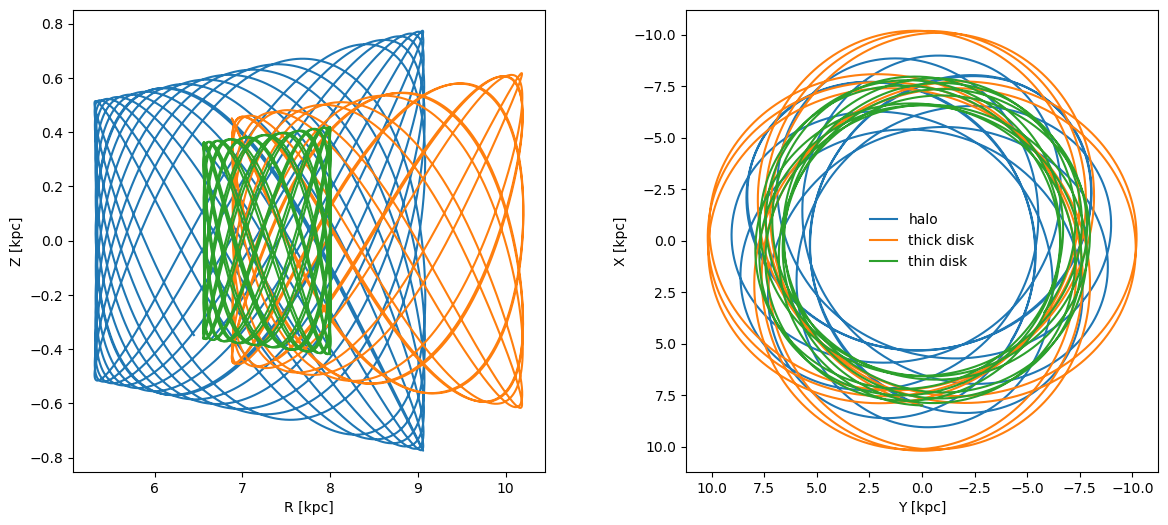

In [12]:
# Plotting orbits
fig = pl.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)

ax1.plot(o_halo.R(ts,quantity=True),o_halo.z(ts,quantity=True))
ax1.plot(o_thick.R(ts,quantity=True),o_thick.z(ts,quantity=True))
ax1.plot(o_thin.R(ts,quantity=True),o_thin.z(ts,quantity=True))


ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('Z [kpc]')


ax2 = fig.add_subplot(122)

ax2.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), label='halo')
ax2.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), label='thick disk')
ax2.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), label='thin disk')

ax2.set_xlabel('Y [kpc]')
ax2.set_ylabel('X [kpc]')

pl.legend(frameon=False)

ax2.invert_xaxis()
ax2.invert_yaxis()
pl.show()


Creating a 3-Dimensional Plot of the trajectories:

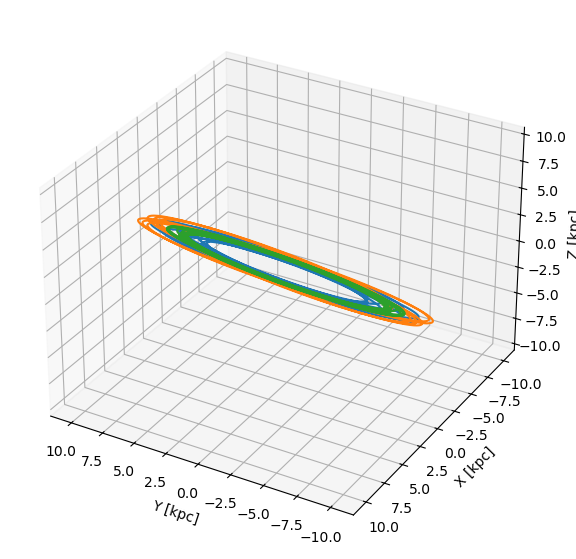

In [14]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(projection='3d')

ax1.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), o_halo.x(ts,quantity=True), label='halo')
ax1.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), o_thick.x(ts,quantity=True), label='thick disk')
ax1.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), o_thin.x(ts,quantity=True), label='thin disk')


ax1.set_xlabel('Y [kpc]')
ax1.set_ylabel('X [kpc]')
ax1.set_zlabel('Z [kpc]')

ax1.invert_xaxis()
ax1.invert_yaxis()
pl.show()

Below we integrate for longer and plot the orbits again:

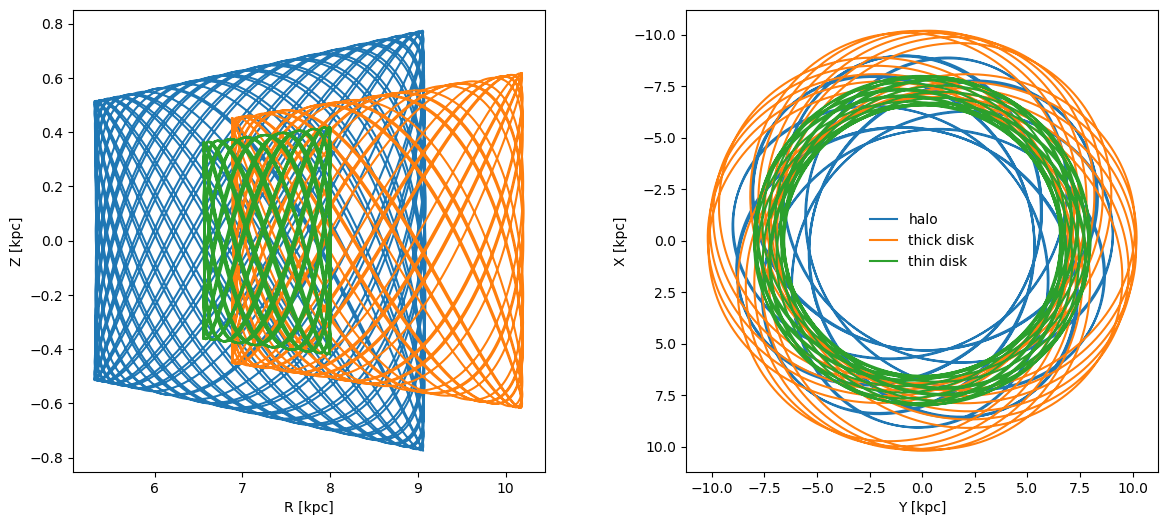

In [17]:
# Number of Gigayears we integrate over
num_gyrs = 4

ts = np.linspace(0,num_gyrs,10000)*u.Gyr


o_thin.integrate(ts,MWPotential2014)

o_thick.integrate(ts,MWPotential2014)

o_halo.integrate(ts,MWPotential2014)


# Plot figures
fig = pl.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)

ax1.plot(o_halo.R(ts,quantity=True),o_halo.z(ts,quantity=True))
ax1.plot(o_thick.R(ts,quantity=True),o_thick.z(ts,quantity=True))
ax1.plot(o_thin.R(ts,quantity=True),o_thin.z(ts,quantity=True))

ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('Z [kpc]')


ax2 = fig.add_subplot(122)

ax2.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), label='halo')
ax2.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), label='thick disk')
ax2.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), label='thin disk')

ax2.set_xlabel('Y [kpc]')
ax2.set_ylabel('X [kpc]')

pl.legend(frameon=False)

ax2.invert_yaxis()
pl.show()


We now plot the Galactic Radial Velocity Component:

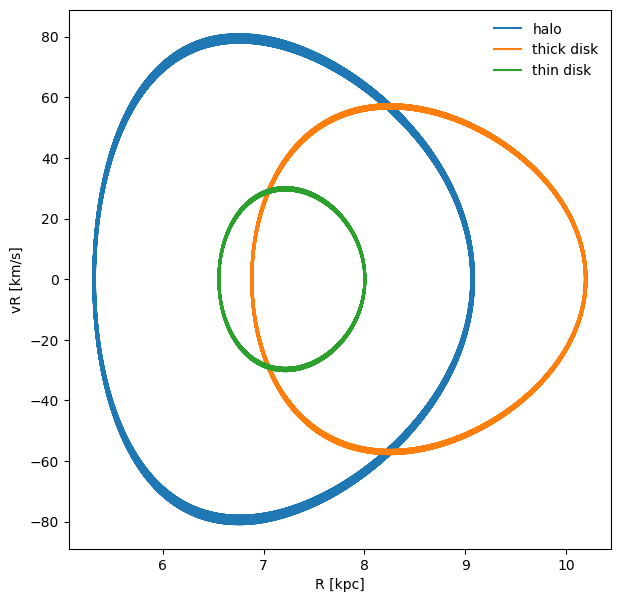

In [18]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

ax1.plot(o_halo.R(ts,quantity=True),o_halo.vR(ts,quantity=True), label='halo')
ax1.plot(o_thick.R(ts,quantity=True),o_thick.vR(ts,quantity=True), label='thick disk')
ax1.plot(o_thin.R(ts,quantity=True),o_thin.vR(ts,quantity=True), label='thin disk')

pl.legend(frameon=False)

ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('vR [km/s]')
pl.show()